In [58]:
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [59]:
import requests
response = requests.get(target_url)
data = response.text
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [60]:
data = data.split('\n')
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [61]:
data

['n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'n00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'n00015388_327\thttp://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'n00015388_355\thttp://img100.imageshack.us/img100/3253/forrest004fs9.jpg',
 'n00015388_373\thttp://img172.imageshack.us/img172/4606/napo03072en9.jpg',
 'n00015388_379\thttp://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg',
 'n00015388_388\thttp://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg',
 'n00015388_442\thttp://www.porschemania.it/discus/messages/815/102099.jpg',
 'n00015388_474\thttp://farm1.static.flickr.com/72/225029238_805b0937ca.jpg',
 'n00015388_514\thttp://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg',
 'n00015388_671\thttp://farm4.static.flickr.com/3217/294261

In [77]:
sp_data = []
for d in data:
    line = d.split('\t')
    sp_data.append(line)

df = pd.DataFrame(sp_data)

In [79]:
df

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...
...,...,...
9991,n00433802_5202,http://farm2.static.flickr.com/1130/960179413_...
9992,n00433802_5204,http://static.flickr.com/150/387324732_f8149d0...
9993,n00433802_5208,http://3.bp.blogspot.com/_9T2cRtlgHV0/SK55RHay...
9994,n00433802_5211,http://www.loudoungymnastics.com/images/Girls_...


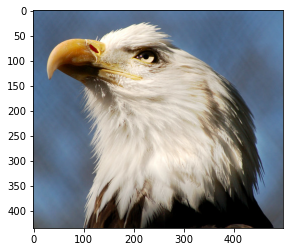

In [81]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.iloc[0,1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [82]:
def img2arr_fromURLs(url_list, resize = False):
    img_list = []
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            if resize:
                img = img.resize((256,256)) # 假如 resize, 就先統一到 256 x 256
            img = np.array(img)
            img_list.append(img)
        except:
            # 只有在 response.status_code 為 200 時，才可以取得圖片，若有 404 或其他 status code, 會碰到 Error, 所以我們用 Try 語法避開取不到的狀況
            pass
    
    return img_list

Total images that we got: 5 


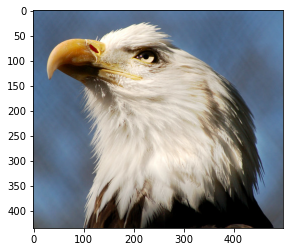

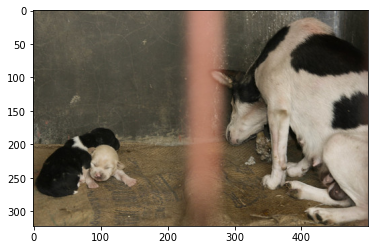

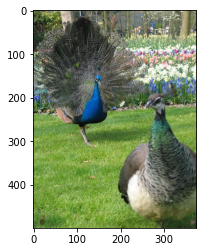

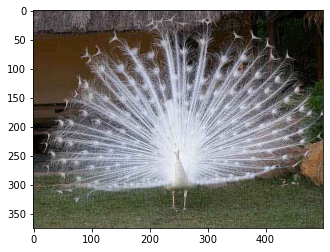

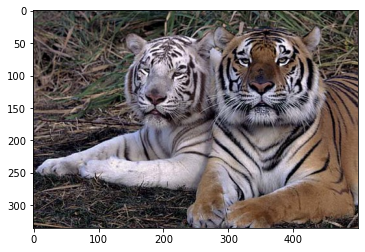

In [88]:
result = img2arr_fromURLs(df[0:10][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

In [117]:
df[0:10][1]#.values

0    http://farm1.static.flickr.com/145/430300483_2...
1    http://farm2.static.flickr.com/1005/3352960681...
2    http://farm1.static.flickr.com/27/51009336_a96...
3    http://farm4.static.flickr.com/3025/2444687979...
4    http://img100.imageshack.us/img100/3253/forres...
5    http://img172.imageshack.us/img172/4606/napo03...
6    http://fotootjesvanannelies.web-log.nl/olifant...
7    http://www.deweekkrant.nl/images/library/pictu...
8    http://www.porschemania.it/discus/messages/815...
9    http://farm1.static.flickr.com/72/225029238_80...
Name: 1, dtype: object

In [115]:
df.iloc[0:10,[1]]#.values

,1
0,http://farm1.static.flickr.com/145/430300483_2...
1,http://farm2.static.flickr.com/1005/3352960681...
2,http://farm1.static.flickr.com/27/51009336_a96...
3,http://farm4.static.flickr.com/3025/2444687979...
4,http://img100.imageshack.us/img100/3253/forres...
5,http://img172.imageshack.us/img172/4606/napo03...
6,http://fotootjesvanannelies.web-log.nl/olifant...
7,http://www.deweekkrant.nl/images/library/pictu...
8,http://www.porschemania.it/discus/messages/815...
9,http://farm1.static.flickr.com/72/225029238_80...
